# Mini Project 4 - Decision Tree

The objective of this mini project is to enable practice in data analysis, classification and prediction.

We have access to some diabetes data of real patients, donated by the N. Inst. of Diabetes & Diges. & Kidney
Dis. and published by Kaggle (https://www.kaggle.com/datasets/mathchi/diabetes-data-set).


Your tasks are
- to explore the data and prepare it for machine learning operations
- to build and implement two machine learning models for classification of the diabetes health status
of a patient: Decision Tree and Naïve Bayes
- to apply appropriate methods and measures for assessing the validity of the models and recommend
the one with highest accuracy
- to create and deploy on the localhost an interactive Streamlit application, visualizing stages and
results of your work
- to test the models and the application with previously unknown input data and printout the
outcomes.

## Load Libraries

In [6]:
# pandas for data structures and operations for manipulating numerical tables and time series
import pandas as pd
from pandas.plotting import scatter_matrix

# matplotlib.pyplot for data plots
import matplotlib.pyplot as plt

# sklearn for machine learning methods
from sklearn import tree
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# for numeric calculations
import numpy as np

# from utilities import visualize_classifier

## 1. Explore the data and prepare it for machine learning operations

### Step 1 Load data: 

In [7]:
# read the data
df = pd.read_csv("./data/diabetes.csv", sep = ',')

### Step 3: Get to Know The Data

In [10]:
# See the shape (number of rows) and size (number of columns)
print(df.shape)

(768, 9)


In [11]:
list(df)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [13]:
# See how it looks (get the first 5 records)
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [15]:
# Have the descriptive statistics calculated for the whole dataset
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [18]:
# to check null values in data
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [20]:
# to check null values in data
np.isnan(df).sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [21]:
# Clean the data, if needed
np.nan_to_num(df)
df[df.notnull()]
df = df.dropna()

In [23]:
# Group by class attribute diag
# See how many classes are included and how many records per class are distributed
print(df.groupby('Pregnancies').size())

Pregnancies
0     111
1     135
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
12      9
13     10
14      2
15      1
17      1
dtype: int64


### Visualization of Dataset Statistics
    1. Draw Box-Whisker Plots
    2. Draw Histograms
    3. Draw Scatter Plot

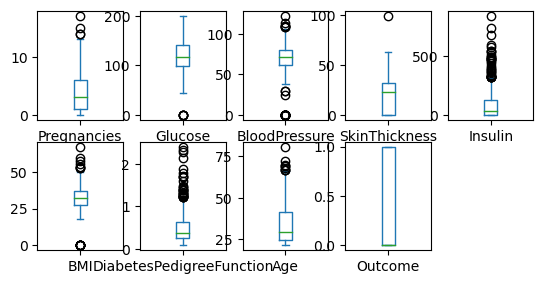

In [25]:
# Draw box-whisker plots
df.plot(kind='box', subplots=True, layout=(3,5), sharex=False, sharey=False)
plt.show()

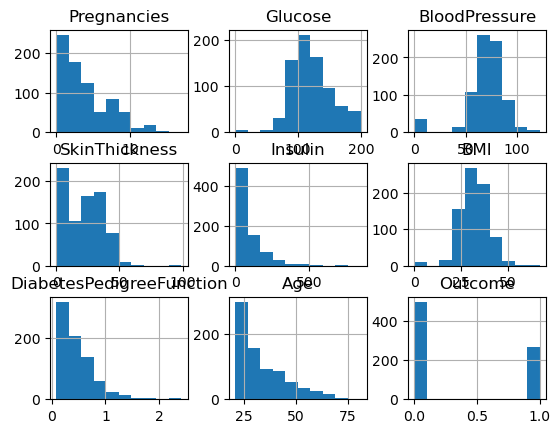

In [26]:
# Draw histograms for each feature
df.hist()
plt.show()

### Prepare The Data For Training

In [27]:
# Convert the dataset into array
array = df.values

In [28]:
# Create two (sub) arrays from it
# X - features, all rows, all columns but the last one
# y - labels, all rows, the last column
X, y = array[:, :-1], array[:, -1]

In [29]:
# Separate input data into classes based on labels
class0 = np.array(X[y==0])
class1 = np.array(X[y==1])
class2 = np.array(X[y==2])
class3 = np.array(X[y==3])
class4 = np.array(X[y==4])

## Step 4: Training
Time to try to train a model.
1. Split the dataset into two: __training set__ and __test set__
2. Build the classifier by implementing __Decision Tree__ algorithm over the training set
3. Test the classifier over the test set
3. Estimate how accurate it is

In [82]:
# Split the dataset into into training and testing sets in proportion 8:2 
#   80% of it as training data
#   20% as a validation dataset
set_prop = 0.25

In [83]:
#  Initialize seed parameter for the random number generator used for the split
seed = 7

In [84]:
# Split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=set_prop, random_state=seed)

In [85]:
# Build Decision Trees Classifier 
params = {'max_depth': 5}
classifier = DecisionTreeClassifier(**params)
# classifier = RandomForestClassifier(n_estimators = 100, max_depth = 6)
 
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [86]:
# Install the graphviz package
!pip install graphviz

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [87]:
# draw tree from the trained data by graphviz package
import graphviz
dot_data = tree.export_graphviz(classifier, out_file=None, 
                         feature_names=df.columns[:8], class_names = True,        
                         filled=True, rounded=True, proportion = False,
                         special_characters=True)  
graph = graphviz.Source(dot_data) 

In [88]:
# result saved in file heart
graph.render("Pregnancies") 

'Pregnancies.pdf'

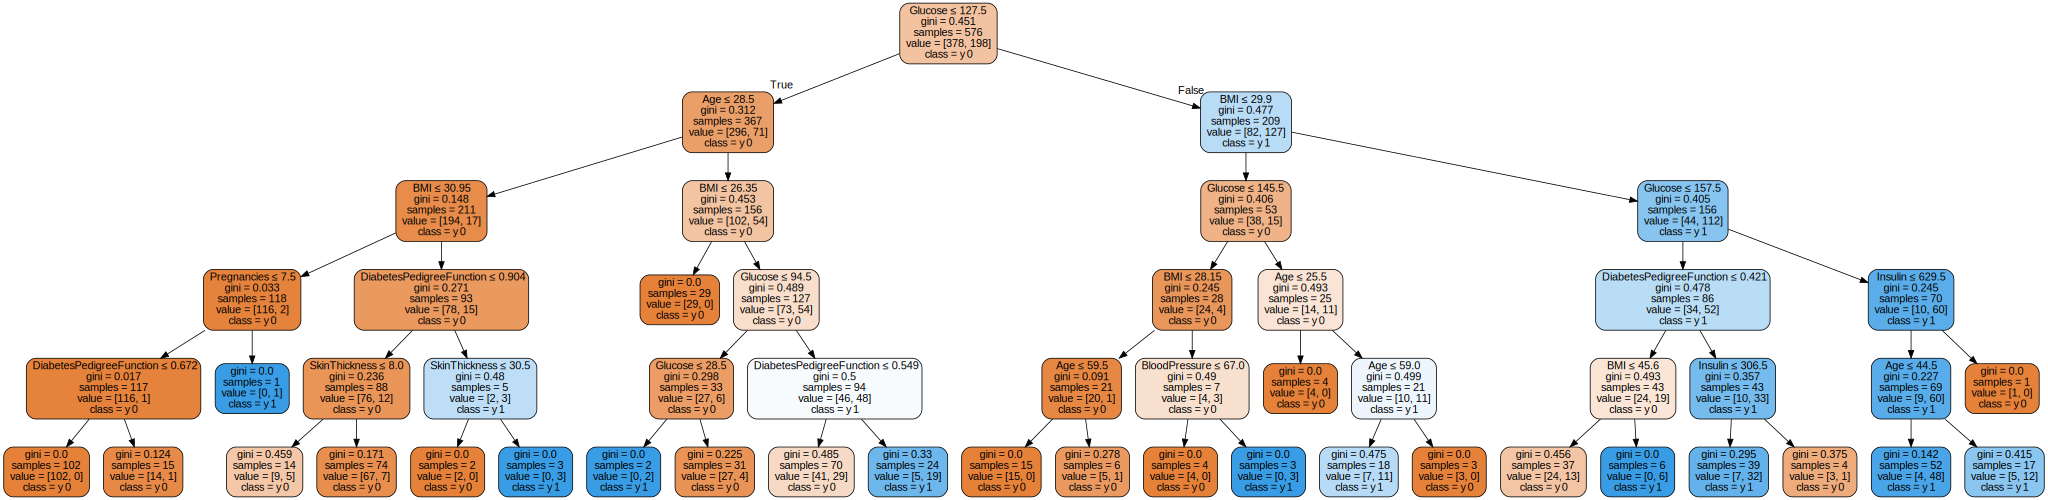

In [93]:
graph

## Step 5. Model Validation

We need a metrics for the evaluation
‘accuracy‘ is the percentage % of correctly predicted instances from the total number of instances in the dataset.

In [94]:
# Set the metrics
# scoring = 'accuracy'

Now we can try to implement the model on our test set.


In [95]:
# Predict the labels of the test data
y_testp = classifier.predict(X_test)
y_testp

array([0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0.])

In [96]:
# Calculated the accuracy of the model comparing the observed data and predicted data
print ("Accuracy is ", accuracy_score(y_test,y_testp))

Accuracy is  0.796875


In [97]:
# Create confusion matrix
confusion_mat = confusion_matrix(y_test,y_testp)
confusion_mat

array([[109,  13],
       [ 26,  44]], dtype=int64)

In [98]:
confusion = pandas.crosstab(y_test,y_testp)
confusion

col_0,0.0,1.0
row_0,,
0.0,109,13
1.0,26,44


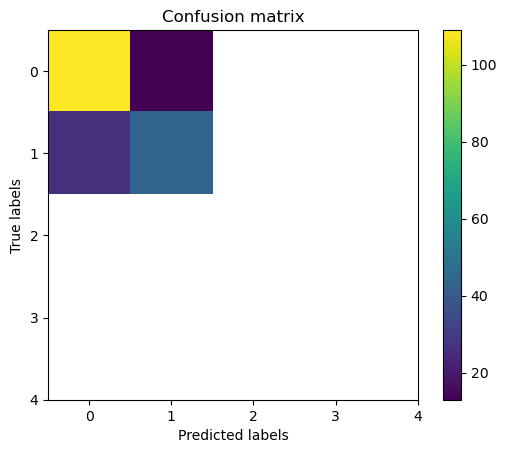

In [99]:
# Visualize confusion matrix
plt.imshow(confusion_mat, interpolation='nearest')
plt.title('Confusion matrix')
plt.colorbar()
ticks = np.arange(5)
plt.xticks(ticks, ticks)
plt.yticks(ticks, ticks)
plt.ylabel('True labels')
plt.xlabel('Predicted labels')
plt.show()

<Axes: >

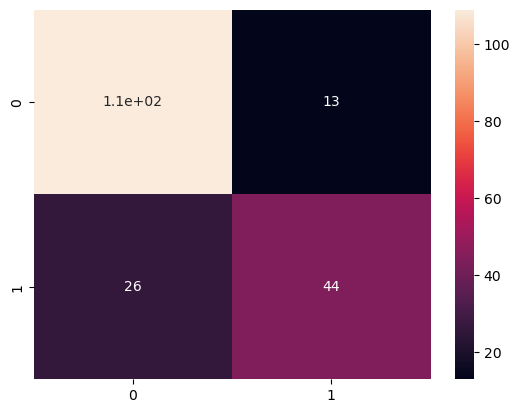

In [100]:
import seaborn as sns
sns.heatmap(confusion_mat, annot=True)

In [101]:
# The diagonal elements (TN, TP) represent the number of points for which the predicted label is equal to the true label, 
# while off-diagonal elements are those that are mislabeled by the classifier. 
# The higher the diagonal values of the confusion matrix the better, indicating many correct predictions.
# FN - False Negative prediction
# FP - False Positive prediction

In [102]:
# Confusion matrix provides an indication of the  errors made in predictions, here in text format
# print(confusion_matrix(y_test, y_testp))

In [103]:
class_names = ['Class0', 'Class1']
# Classifier performance on training dataset
print(classification_report(y_train, classifier.predict(X_train), target_names=class_names))
plt.show()

              precision    recall  f1-score   support

      Class0       0.85      0.93      0.89       378
      Class1       0.83      0.69      0.75       198

    accuracy                           0.85       576
   macro avg       0.84      0.81      0.82       576
weighted avg       0.84      0.85      0.84       576



In [104]:
# Classifier performance on test dataset
print(classification_report(y_test, classifier.predict(X_test), target_names=class_names))
plt.show()

              precision    recall  f1-score   support

      Class0       0.81      0.89      0.85       122
      Class1       0.77      0.63      0.69        70

    accuracy                           0.80       192
   macro avg       0.79      0.76      0.77       192
weighted avg       0.79      0.80      0.79       192

